In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN, KMeans

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

#First, I imported pandas as pd to ensure the library is uploaded so that I can use it's functions. Since I am using Google Colab, I need to mount my google drive
#so that I have access to all my files. I uploaded the data file to my Google Drive.

Mounted at /content/drive


In [4]:
file1 = pd.read_csv(f"/content/drive/MyDrive/Copy of MBTI top 1000.csv",encoding='ISO-8859-1', engine='python', index_col=0)
df = pd.DataFrame(file1)
display(df)

titletype              primarytitle             originaltitle  \
tconst                                                                    
tt0111161     movie  The Shawshank Redemption  The Shawshank Redemption   
tt0468569     movie           The Dark Knight           The Dark Knight   
tt1375666     movie                 Inception                 Inception   
tt0137523     movie                Fight Club                Fight Club   
tt0109830     movie              Forrest Gump              Forrest Gump   
...             ...                       ...                       ...   
tt0062512     movie       You Only Live Twice       You Only Live Twice   
tt1315981     movie              A Single Man              A Single Man   
tt0097239     movie        Driving Miss Daisy        Driving Miss Daisy   
tt2304933     movie              The 5th Wave              The 5th Wave   
tt1114740     movie      Paul Blart: Mall Cop      Paul Blart: Mall Cop   

           isadult  startyear  runtimeminutes                     genres  \
tconst                                                                     
tt0111161        0       1994             142                      Drama   
tt0468569        0       2008             152         Action,Crime,Drama   
tt1375666        0       2010             148    Action,Adventure,Sci-Fi   
tt0137523        0       1999             139                      Drama   
tt0109830        0       1994             142              Drama,Romance   
...            ...        ...             ...                        ...   
tt0062512        0       1967             117  Action,Adventure,Thriller   
tt1315981        0       2009              99        Crime,Drama,Romance   
tt0097239        0       1989              99               Comedy,Drama   
tt2304933        0       2016             112    Action,Adventure,Sci-Fi   
tt1114740        0       2009              91        Action,Comedy,Crime   

            tconst-2  averagerating  numvotes   lead_character lead_MBTI  \
tconst                                                                     
tt0111161  tt0111161            9.3   2934011    Andy Dufresne      INTJ   
tt0468569  tt0468569            9.0   2914377      Bruce Wayne      INTJ   
tt1375666  tt1375666            8.8   2587898    Dominick Cobb      ISTP   
tt0137523  tt0137523            8.8   2365490     The Narrator      ISFJ   
tt0109830  tt0109830            8.8   2294581     Forrest Gump      ISFJ   
...              ...            ...       ...              ...       ...   
tt0062512  tt0062512            6.8    118719       James Bond      ISTP   
tt1315981  tt1315981            7.5    118682  George Falconer      INFJ   
tt0097239  tt0097239            7.3    118616     Hoke Colburn      ENFJ   
tt2304933  tt2304933            5.2    118613  Cassie Sullivan      ISFP   
tt1114740  tt1114740            5.3    118596       Paul Blart      ESFP   

           lead_votes           second_lead secondlead_MBTI  secondlead_votes  \
tconst                                                                          
tt0111161        5340         Warden Norton            ESTJ              3807   
tt0468569        4893             The Joker            ENTP              5942   
tt1375666        4034                Arthur            ISTJ              2243   
tt0137523         139          Tyler Durden            ENTP              2834   
tt0109830        3720          Jenny Curran            ESFP              3037   
...               ...                   ...             ...               ...   
tt0062512         164  Ernst Stavro Blofeld            ENTJ               119   
tt1315981         167          Kenny Potter            ENFP               134   
tt0097239          73         Daisy Werthan            ISTJ               187   
tt2304933          60            Ben Parish            ISFP                34   
tt1114740         124            Veck Simms            ENTJ                39   

  

# it wont look the exact time each time its run, but the edges/nodes/thickness are the same. it randomizes each time.


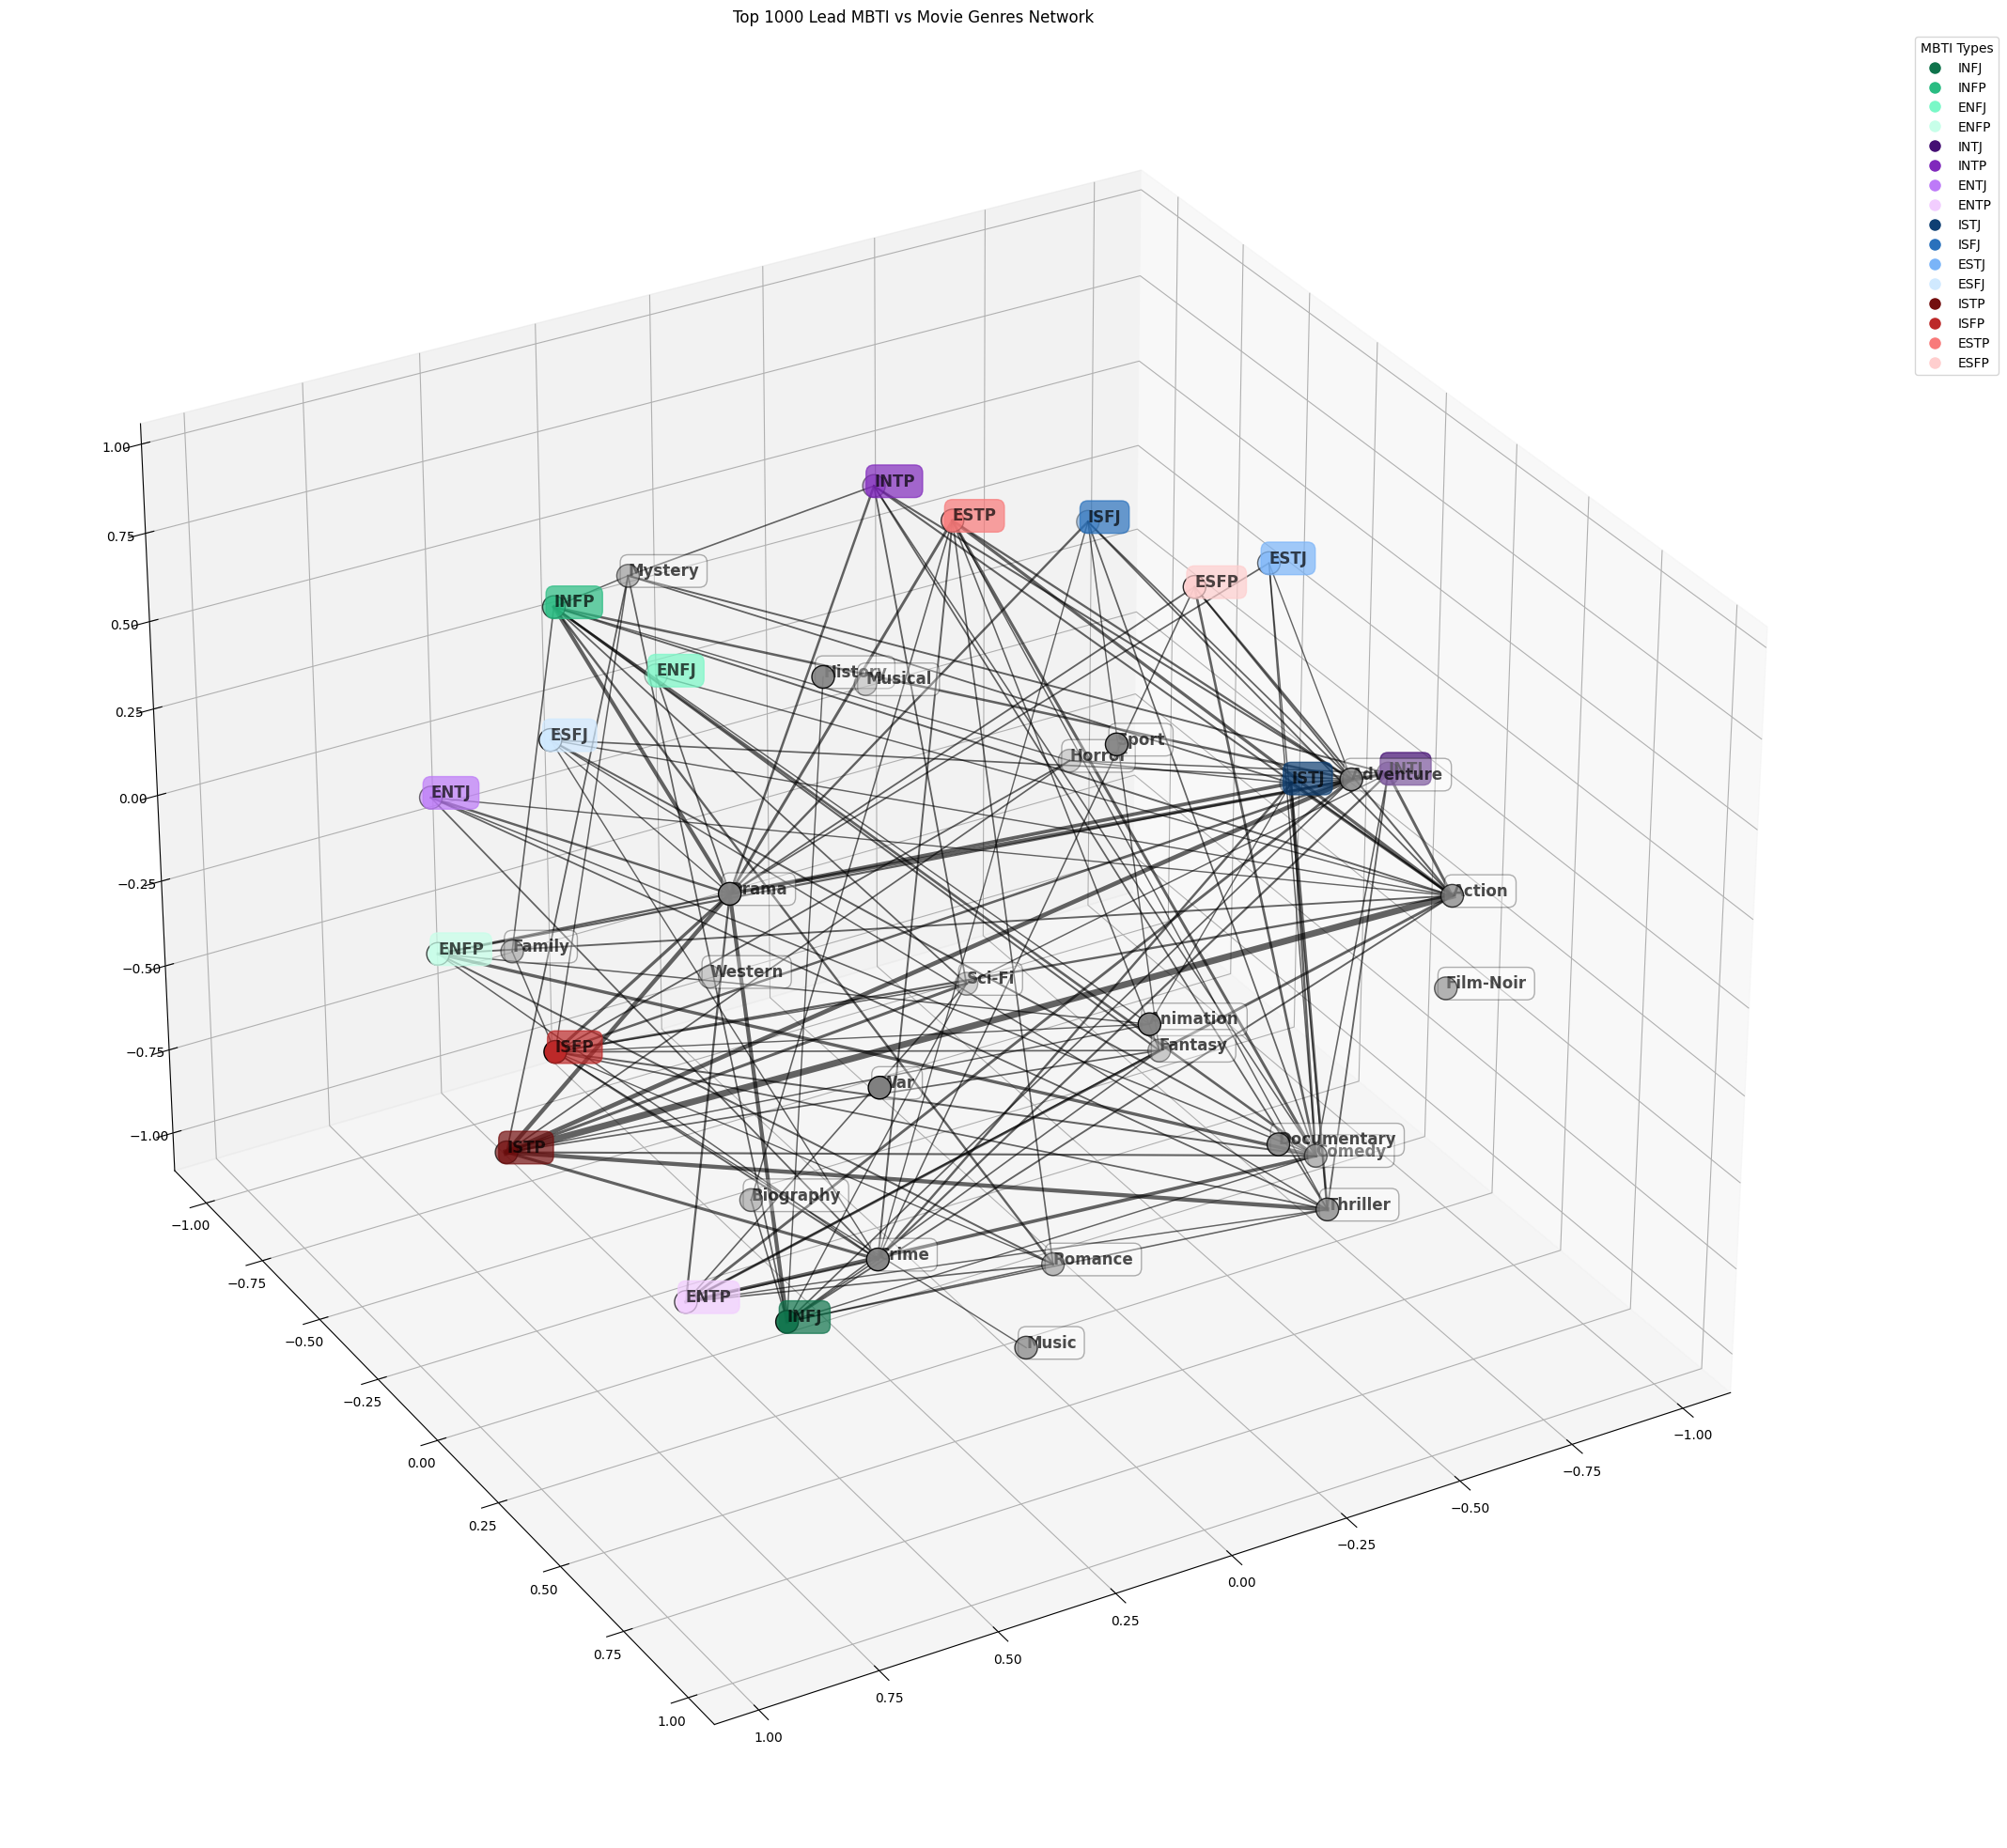

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import matplotlib.cm as cm  # Import colormap
import numpy as np  # To normalize the weights

# Assuming your dataframe is already loaded as 'df'
mbti_column = 'lead_MBTI'  # Column for lead MBTI type
genres_column = 'genres'   # Column for genres (which are comma-separated)

# Define the genres list (for valid genre types)
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# MBTI color mapping from the image provided
mbti_colors = {
    'INFJ': '#0E734B', 'INFP': '#29BC82', 'ENFJ': '#7AF8C7', 'ENFP': '#C7FFE9',
    'INTJ': '#440E73', 'INTP': '#8029BC', 'ENTJ': '#BD7AF8', 'ENTP': '#F2CDFF',
    'ISTJ': '#0E3F73', 'ISFJ': '#2971BC', 'ESTJ': '#7AB4F8', 'ESFJ': '#D0E9FF',
    'ISTP': '#730E0E', 'ISFP': '#BC2929', 'ESTP': '#F87A7A', 'ESFP': '#FFCECE'
}

# Set genre color to gray for simplicity
genre_color = '#808080'  # Gray color for all genre nodes

# Initialize a bipartite graph
B = nx.Graph()

# Add MBTI types as nodes (from 'lead_MBTI' column)
mbti_types = df[mbti_column].unique()  # Get unique MBTI types from the dataset
B.add_nodes_from(mbti_types, bipartite=0)  # Set of MBTI types

# Add genres as nodes
B.add_nodes_from(genres, bipartite=1)  # Set of genres

# Dictionary to hold the weight of each edge
edge_weights = {}

# Iterate through each row in the dataset
for index, row in df.iterrows():
    mbti = row[mbti_column]  # Get the MBTI type for the lead character

    # Check if genres column has any value, skip if NaN or empty
    if pd.notnull(row[genres_column]):
        # Split the genres string into a list, and make sure to strip any extra spaces
        row_genres = [genre.strip() for genre in row[genres_column].split(',') if genre.strip()]

        # Create edges between the MBTI and each genre in the list and count weights
        for genre in row_genres:
            if genre in genres:  # Only add edges for valid genres
                if (mbti, genre) in edge_weights:
                    edge_weights[(mbti, genre)] += 1
                else:
                    edge_weights[(mbti, genre)] = 1

# Now that we have edge weights, calculate the mean weight
mean_weight = np.mean(list(edge_weights.values()))

# Adjust the threshold to include more edges (slightly below the mean weight)
threshold_weight = mean_weight * 0.7  # Adjust this to fit more edges

# Filter edges to only keep those with weight >= threshold_weight
filtered_edges = [(u, v) for (u, v), weight in edge_weights.items() if weight >= threshold_weight]
filtered_weights = [weight for (u, v), weight in edge_weights.items() if weight >= threshold_weight]

# Normalize the filtered edge weights for color mapping and thickness
normalized_weights = (np.array(filtered_weights) - np.min(filtered_weights)) / (np.max(filtered_weights) - np.min(filtered_weights))

# Create a custom grayscale colormap, starting with a lighter grey and going to dark grey
light_gray_cmap = cm.ScalarMappable(cmap='Greys_r')
edge_colors = [light_gray_cmap.to_rgba(normalized_weights[i] * 0.8 + 0.2) for i in range(len(filtered_weights))]

# Set edge thickness proportional to the weight, but reduce the range for clarity
edge_thickness = [1 + 4 * normalized_weights[i] for i in range(len(filtered_weights))]  # Thickness range: 1 to 5

# Use a 3D layout for node positioning
pos_3d = nx.spring_layout(B, dim=3, k=1.5, iterations=150)  # Increased 'k' for more spacing

# Increase the figure size for better visibility and add gridlines
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
ax.grid(True)  # Enable gridlines

# Extract positions for nodes
xs = [pos_3d[node][0] for node in B.nodes()]
ys = [pos_3d[node][1] for node in B.nodes()]
zs = [pos_3d[node][2] for node in B.nodes()]

# Draw nodes for MBTI types with color coding based on MBTI types, smaller size, and border
mbti_nodes = [node for node in B.nodes if node in mbti_types]
mbti_xs = [pos_3d[node][0] for node in mbti_nodes]
mbti_ys = [pos_3d[node][1] for node in mbti_nodes]
mbti_zs = [pos_3d[node][2] for node in mbti_nodes]
mbti_plot = ax.scatter(mbti_xs, mbti_ys, mbti_zs, c=[mbti_colors[n] for n in mbti_nodes], s=300, edgecolor='black', linewidth=1, label='MBTI Types')

# Draw nodes for genres in gray
genre_nodes = [node for node in B.nodes if node in genres]
genre_xs = [pos_3d[node][0] for node in genre_nodes]
genre_ys = [pos_3d[node][1] for node in genre_nodes]
genre_zs = [pos_3d[node][2] for node in genre_nodes]
genre_plot = ax.scatter(genre_xs, genre_ys, genre_zs, c=genre_color, s=300, edgecolor='black', linewidth=1, label='Genres')

# Draw edges with color based on the weight (darker edges for heavier weights) and thickness based on weight, add transparency
for edge, color, thickness in zip(filtered_edges, edge_colors, edge_thickness):
    x = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x, y, z, color=color, linewidth=thickness, alpha=0.6)  # Add transparency to edges

# Add labels to MBTI types with black text and background matching MBTI colors
for node, (x, y, z) in pos_3d.items():
    if node in mbti_types:
        ax.text(x, y, z, s=node, fontsize=12, fontweight='bold', color='black', alpha=0.7,
                bbox=dict(facecolor=mbti_colors[node], edgecolor=mbti_colors[node], alpha=0.7, boxstyle='round,pad=0.5'))

# Add labels to genres with white background and dark text
for node, (x, y, z) in pos_3d.items():
    if node in genres:
        ax.text(x, y, z, s=node, fontsize=12, fontweight='bold', color='black', alpha=0.7,
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.3, boxstyle='round,pad=0.5'))

# Adjust the viewing angle
ax.view_init(elev=30, azim=60)  # Set elevation and azimuth for a clearer view

# Add a color legend for MBTI types
handles = [plt.Line2D([0], [0], marker='o', color='w', label=mbti, markerfacecolor=mbti_colors[mbti], markersize=10) for mbti in mbti_colors]
plt.legend(handles=handles, title="MBTI Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Display the 3D graph
plt.title('Top 1000 Lead MBTI vs Movie Genres Network')
plt.show()


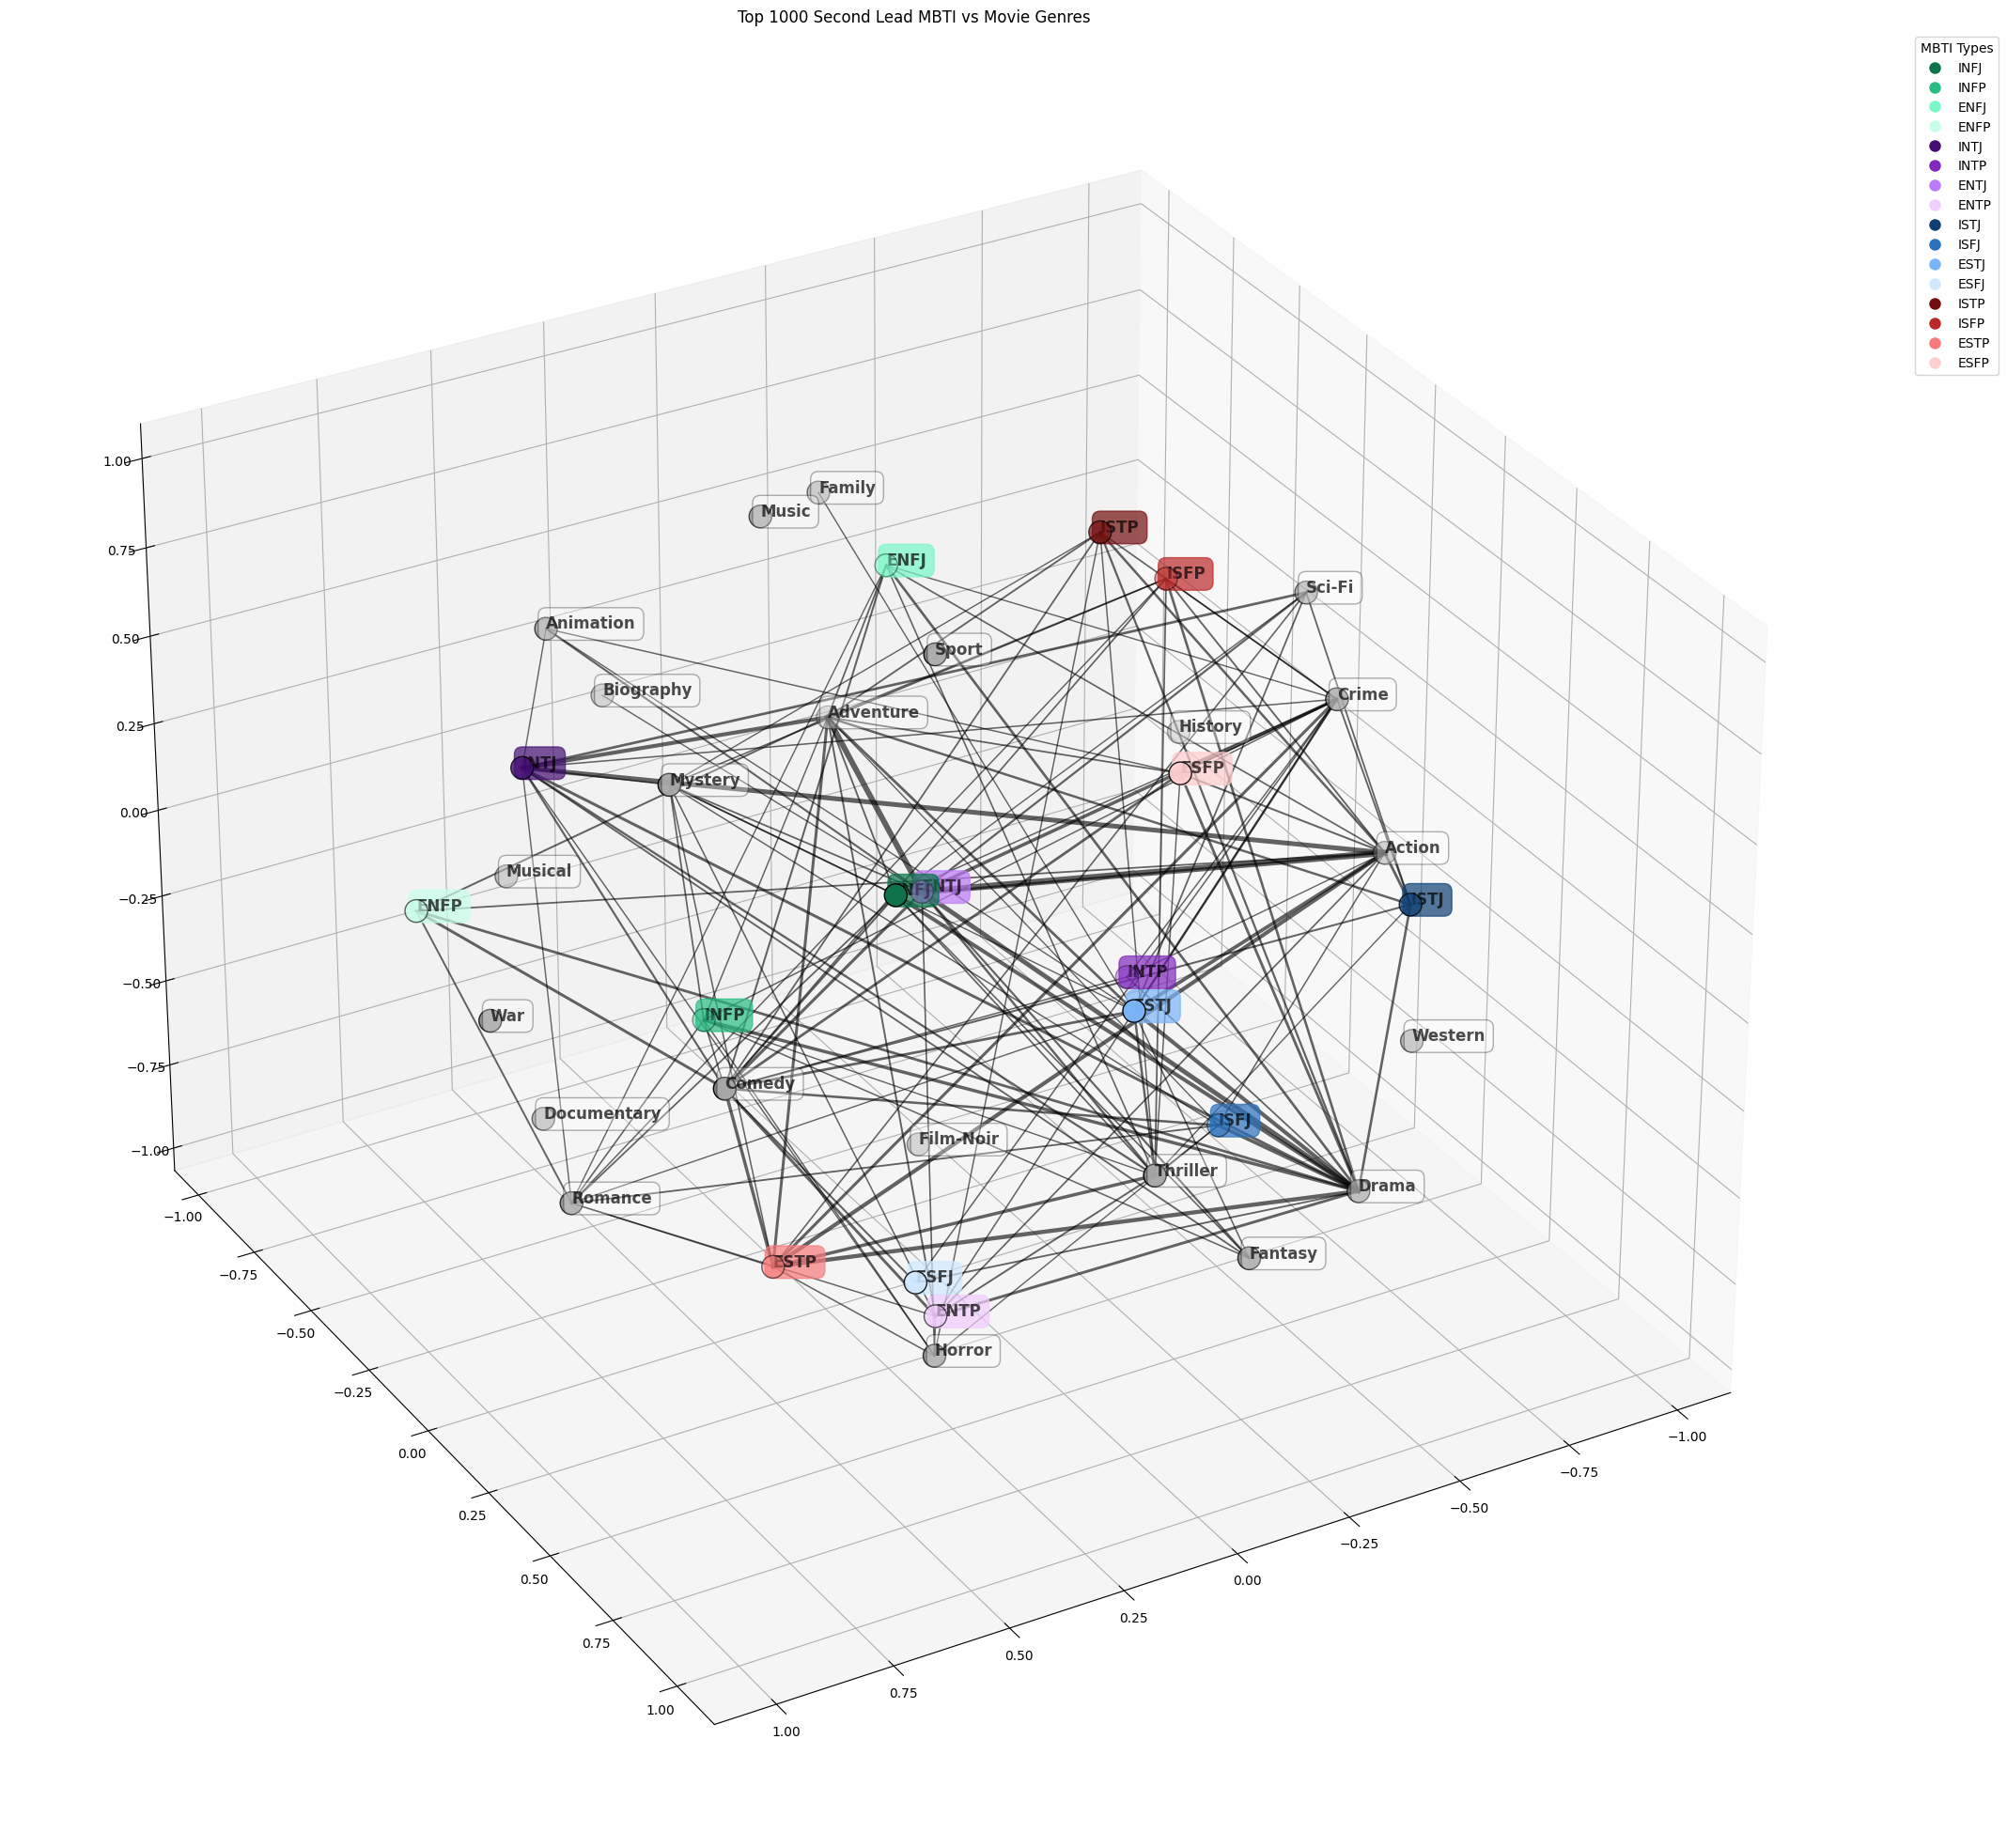

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import matplotlib.cm as cm  # Import colormap
import numpy as np  # To normalize the weights

# Assuming your dataframe is already loaded as 'df'
mbti_column = 'secondlead_MBTI'  # Column for second lead MBTI type
genres_column = 'genres'   # Column for genres (which are comma-separated)

# Define the genres list (for valid genre types)
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# MBTI color mapping from the image provided
mbti_colors = {
    'INFJ': '#0E734B', 'INFP': '#29BC82', 'ENFJ': '#7AF8C7', 'ENFP': '#C7FFE9',
    'INTJ': '#440E73', 'INTP': '#8029BC', 'ENTJ': '#BD7AF8', 'ENTP': '#F2CDFF',
    'ISTJ': '#0E3F73', 'ISFJ': '#2971BC', 'ESTJ': '#7AB4F8', 'ESFJ': '#D0E9FF',
    'ISTP': '#730E0E', 'ISFP': '#BC2929', 'ESTP': '#F87A7A', 'ESFP': '#FFCECE'
}

# Set genre color to gray
genre_color = '#808080'  # Gray color for all genre nodes

# Initialize a bipartite graph
B = nx.Graph()

# Add MBTI types as nodes (from 'secondlead_MBTI' column)
mbti_types = df[mbti_column].unique()  # Get unique MBTI types from the dataset
B.add_nodes_from(mbti_types, bipartite=0)  # Set of MBTI types

# Add genres as nodes
B.add_nodes_from(genres, bipartite=1)  # Set of genres

# Dictionary to hold the weight of each edge
edge_weights = {}

# Iterate through each row in the dataset
for index, row in df.iterrows():
    mbti = row[mbti_column]  # Get the MBTI type for the second lead character

    # Check if genres column has any value, skip if NaN or empty
    if pd.notnull(row[genres_column]):
        # Split the genres string into a list, and make sure to strip any extra spaces
        row_genres = [genre.strip() for genre in row[genres_column].split(',') if genre.strip()]

        # Create edges between the MBTI and each genre in the list and count weights
        for genre in row_genres:
            if genre in genres:  # Only add edges for valid genres
                if (mbti, genre) in edge_weights:
                    edge_weights[(mbti, genre)] += 1
                else:
                    edge_weights[(mbti, genre)] = 1

# Now that we have edge weights, calculate the mean weight
mean_weight = np.mean(list(edge_weights.values()))

# Adjust the threshold to include more edges (slightly below the mean weight)
threshold_weight = mean_weight * 0.7  # Adjust this to fit more edges

# Filter edges to only keep those with weight >= threshold_weight
filtered_edges = [(u, v) for (u, v), weight in edge_weights.items() if weight >= threshold_weight]
filtered_weights = [weight for (u, v), weight in edge_weights.items() if weight >= threshold_weight]

# Normalize the filtered edge weights for color mapping and thickness
normalized_weights = (np.array(filtered_weights) - np.min(filtered_weights)) / (np.max(filtered_weights) - np.min(filtered_weights))

# Create a custom grayscale colormap, starting with a lighter grey and going to dark grey
light_gray_cmap = cm.ScalarMappable(cmap='Greys_r')
edge_colors = [light_gray_cmap.to_rgba(normalized_weights[i] * 0.8 + 0.2) for i in range(len(filtered_weights))]

# Set edge thickness proportional to the weight, but reduce the range for clarity
edge_thickness = [1 + 4 * normalized_weights[i] for i in range(len(filtered_weights))]  # Thickness range: 1 to 5

# Use a 3D layout for node positioning
pos_3d = nx.spring_layout(B, dim=3, k=1.5, iterations=150)  # Increased 'k' for more spacing

# Increase the figure size for better visibility and add gridlines
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
ax.grid(True)  # Enable gridlines

# Extract positions for nodes
xs = [pos_3d[node][0] for node in B.nodes()]
ys = [pos_3d[node][1] for node in B.nodes()]
zs = [pos_3d[node][2] for node in B.nodes()]

# Draw nodes for MBTI types with color coding based on MBTI types, smaller size, and border
mbti_nodes = [node for node in B.nodes if node in mbti_types]
mbti_xs = [pos_3d[node][0] for node in mbti_nodes]
mbti_ys = [pos_3d[node][1] for node in mbti_nodes]
mbti_zs = [pos_3d[node][2] for node in mbti_nodes]
mbti_plot = ax.scatter(mbti_xs, mbti_ys, mbti_zs, c=[mbti_colors[n] for n in mbti_nodes], s=300, edgecolor='black', linewidth=1, label='MBTI Types')

# Draw nodes for genres in gray
genre_nodes = [node for node in B.nodes if node in genres]
genre_xs = [pos_3d[node][0] for node in genre_nodes]
genre_ys = [pos_3d[node][1] for node in genre_nodes]
genre_zs = [pos_3d[node][2] for node in genre_nodes]
genre_plot = ax.scatter(genre_xs, genre_ys, genre_zs, c=genre_color, s=300, edgecolor='black', linewidth=1, label='Genres')

# Draw edges with color based on the weight (darker edges for heavier weights) and thickness based on weight, add transparency
for edge, color, thickness in zip(filtered_edges, edge_colors, edge_thickness):
    x = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x, y, z, color=color, linewidth=thickness, alpha=0.6)  # Add transparency to edges

# Add labels to MBTI types with black text and background matching MBTI colors
for node, (x, y, z) in pos_3d.items():
    if node in mbti_types:
        ax.text(x, y, z, s=node, fontsize=12, fontweight='bold', color='black', alpha=0.7,
                bbox=dict(facecolor=mbti_colors[node], edgecolor=mbti_colors[node], alpha=0.7, boxstyle='round,pad=0.5'))

# Add labels to genres with white background and dark text
for node, (x, y, z) in pos_3d.items():
    if node in genres:
        ax.text(x, y, z, s=node, fontsize=12, fontweight='bold', color='black', alpha=0.7,
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.3, boxstyle='round,pad=0.5'))

# Adjust the viewing angle
ax.view_init(elev=30, azim=60)  # Set elevation and azimuth for a clearer view

# Add a color legend for MBTI types
handles = [plt.Line2D([0], [0], marker='o', color='w', label=mbti, markerfacecolor=mbti_colors[mbti], markersize=10) for mbti in mbti_colors]
plt.legend(handles=handles, title="MBTI Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Display the 3D graph
plt.title('Top 1000 Second Lead MBTI vs Movie Genres')
plt.show()


In [5]:
file2 = pd.read_csv(f"/content/drive/MyDrive/COPY MBTI complete 4500 (1).csv",encoding='ISO-8859-1', engine='python', index_col=0)
df2 = pd.DataFrame(file2)

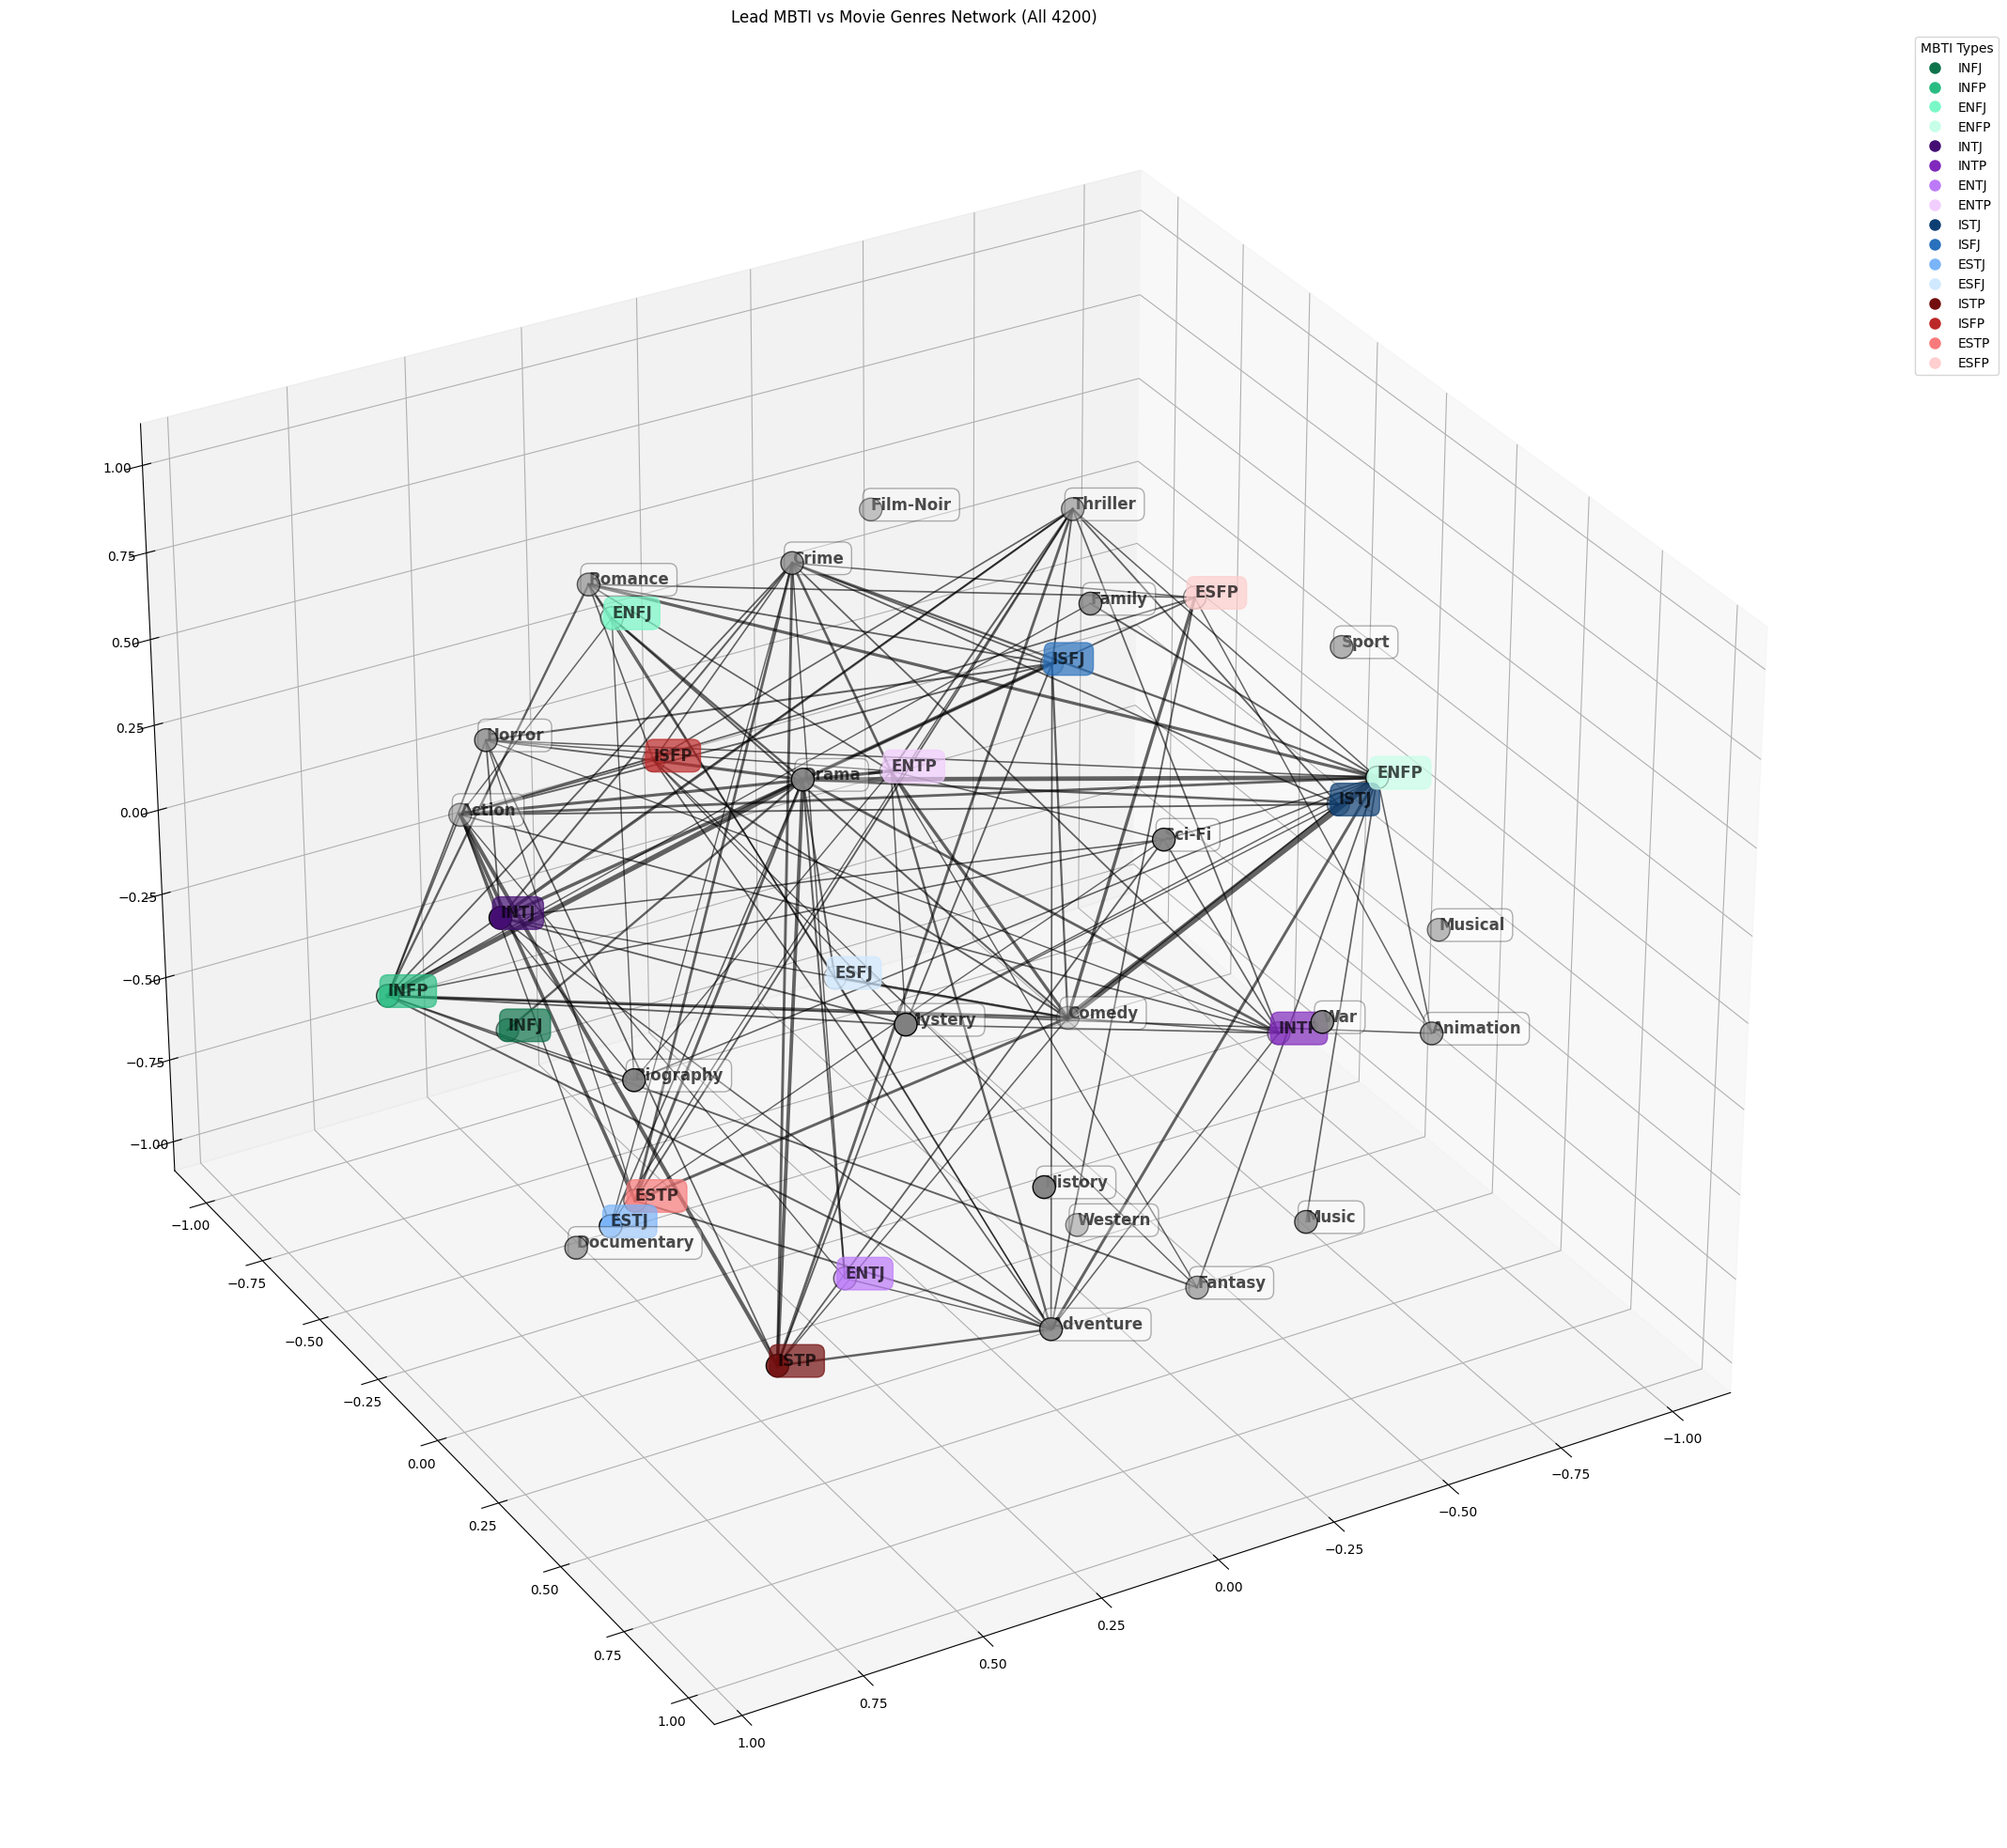

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import matplotlib.cm as cm  # Import colormap
import numpy as np  # To normalize the weights

# Assuming your dataframe is already loaded as 'df2'
mbti_column = 'lead_MBTI'  # Column for lead MBTI type
genres_column = 'genres'   # Column for genres (which are comma-separated)

# Define the genres list (for valid genre types)
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# MBTI color mapping from the image provided
mbti_colors = {
    'INFJ': '#0E734B', 'INFP': '#29BC82', 'ENFJ': '#7AF8C7', 'ENFP': '#C7FFE9',
    'INTJ': '#440E73', 'INTP': '#8029BC', 'ENTJ': '#BD7AF8', 'ENTP': '#F2CDFF',
    'ISTJ': '#0E3F73', 'ISFJ': '#2971BC', 'ESTJ': '#7AB4F8', 'ESFJ': '#D0E9FF',
    'ISTP': '#730E0E', 'ISFP': '#BC2929', 'ESTP': '#F87A7A', 'ESFP': '#FFCECE'
}

# Set genre color to gray
genre_color = '#808080'  # Gray color for all genre nodes

# Initialize a bipartite graph
B = nx.Graph()

# Add MBTI types as nodes (from 'lead_MBTI' column)
mbti_types = df2[mbti_column].unique()  # Get unique MBTI types from the dataset
B.add_nodes_from(mbti_types, bipartite=0)  # Set of MBTI types

# Add genres as nodes
B.add_nodes_from(genres, bipartite=1)  # Set of genres

# Dictionary to hold the weight of each edge
edge_weights = {}

# Iterate through each row in the dataset
for index, row in df2.iterrows():
    mbti = row[mbti_column]  # Get the MBTI type for the lead character

    # Check if genres column has any value, skip if NaN or empty
    if pd.notnull(row[genres_column]):
        # Split the genres string into a list, and make sure to strip any extra spaces
        row_genres = [genre.strip() for genre in row[genres_column].split(',') if genre.strip()]

        # Create edges between the MBTI and each genre in the list and count weights
        for genre in row_genres:
            if genre in genres:  # Only add edges for valid genres
                if (mbti, genre) in edge_weights:
                    edge_weights[(mbti, genre)] += 1
                else:
                    edge_weights[(mbti, genre)] = 1

# Now that we have edge weights, calculate the mean weight
mean_weight = np.mean(list(edge_weights.values()))

# Adjust the threshold to include more edges (slightly below the mean weight)
threshold_weight = mean_weight * 0.7  # Adjust this to fit more edges

# Filter edges to only keep those with weight >= threshold_weight
filtered_edges = [(u, v) for (u, v), weight in edge_weights.items() if weight >= threshold_weight]
filtered_weights = [weight for (u, v), weight in edge_weights.items() if weight >= threshold_weight]

# Normalize the filtered edge weights for color mapping and thickness
normalized_weights = (np.array(filtered_weights) - np.min(filtered_weights)) / (np.max(filtered_weights) - np.min(filtered_weights))

# Create a custom grayscale colormap, starting with a lighter grey and going to dark grey
light_gray_cmap = cm.ScalarMappable(cmap='Greys_r')
edge_colors = [light_gray_cmap.to_rgba(normalized_weights[i] * 0.8 + 0.2) for i in range(len(filtered_weights))]

# Set edge thickness proportional to the weight, but reduce the range for clarity
edge_thickness = [1 + 4 * normalized_weights[i] for i in range(len(filtered_weights))]  # Thickness range: 1 to 5

# Use a 3D layout for node positioning
pos_3d = nx.spring_layout(B, dim=3, k=1.5, iterations=150)  # Increased 'k' for more spacing

# Increase the figure size for better visibility and add gridlines
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
ax.grid(True)  # Enable gridlines

# Extract positions for nodes
xs = [pos_3d[node][0] for node in B.nodes()]
ys = [pos_3d[node][1] for node in B.nodes()]
zs = [pos_3d[node][2] for node in B.nodes()]

# Draw nodes for MBTI types with color coding based on MBTI types, smaller size, and border
mbti_nodes = [node for node in B.nodes if node in mbti_types]
mbti_xs = [pos_3d[node][0] for node in mbti_nodes]
mbti_ys = [pos_3d[node][1] for node in mbti_nodes]
mbti_zs = [pos_3d[node][2] for node in mbti_nodes]
mbti_plot = ax.scatter(mbti_xs, mbti_ys, mbti_zs, c=[mbti_colors[n] for n in mbti_nodes], s=300, edgecolor='black', linewidth=1, label='MBTI Types')

# Draw nodes for genres with gray color
genre_nodes = [node for node in B.nodes if node in genres]
genre_xs = [pos_3d[node][0] for node in genre_nodes]
genre_ys = [pos_3d[node][1] for node in genre_nodes]
genre_zs = [pos_3d[node][2] for node in genre_nodes]
genre_plot = ax.scatter(genre_xs, genre_ys, genre_zs, c=genre_color, s=300, edgecolor='black', linewidth=1, label='Genres')

# Draw edges with color based on the weight (darker edges for heavier weights) and thickness based on weight, add transparency
for edge, color, thickness in zip(filtered_edges, edge_colors, edge_thickness):
    x = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x, y, z, color=color, linewidth=thickness, alpha=0.6)  # Add transparency to edges

# Add labels to MBTI types with black text and background matching MBTI colors
for node, (x, y, z) in pos_3d.items():
    if node in mbti_types:
        ax.text(x, y, z, s=node, fontsize=12, fontweight='bold', color='black', alpha=0.7,
                bbox=dict(facecolor=mbti_colors[node], edgecolor=mbti_colors[node], alpha=0.7, boxstyle='round,pad=0.5'))

# Add labels to genres with transparent background and slightly transparent text
for node, (x, y, z) in pos_3d.items():
    if node in genres:
        ax.text(x, y, z, s=node, fontsize=12, fontweight='bold', color='black', alpha=0.7,
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.3, boxstyle='round,pad=0.5'))

# Adjust the viewing angle
ax.view_init(elev=30, azim=60)  # Set elevation and azimuth for a clearer view

# Add a color legend for MBTI types
handles = [plt.Line2D([0], [0], marker='o', color='w', label=mbti, markerfacecolor=mbti_colors[mbti], markersize=10) for mbti in mbti_colors]
plt.legend(handles=handles, title="MBTI Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Display the 3D graph
plt.title('Lead MBTI vs Movie Genres Network (All 4200)')
plt.show()


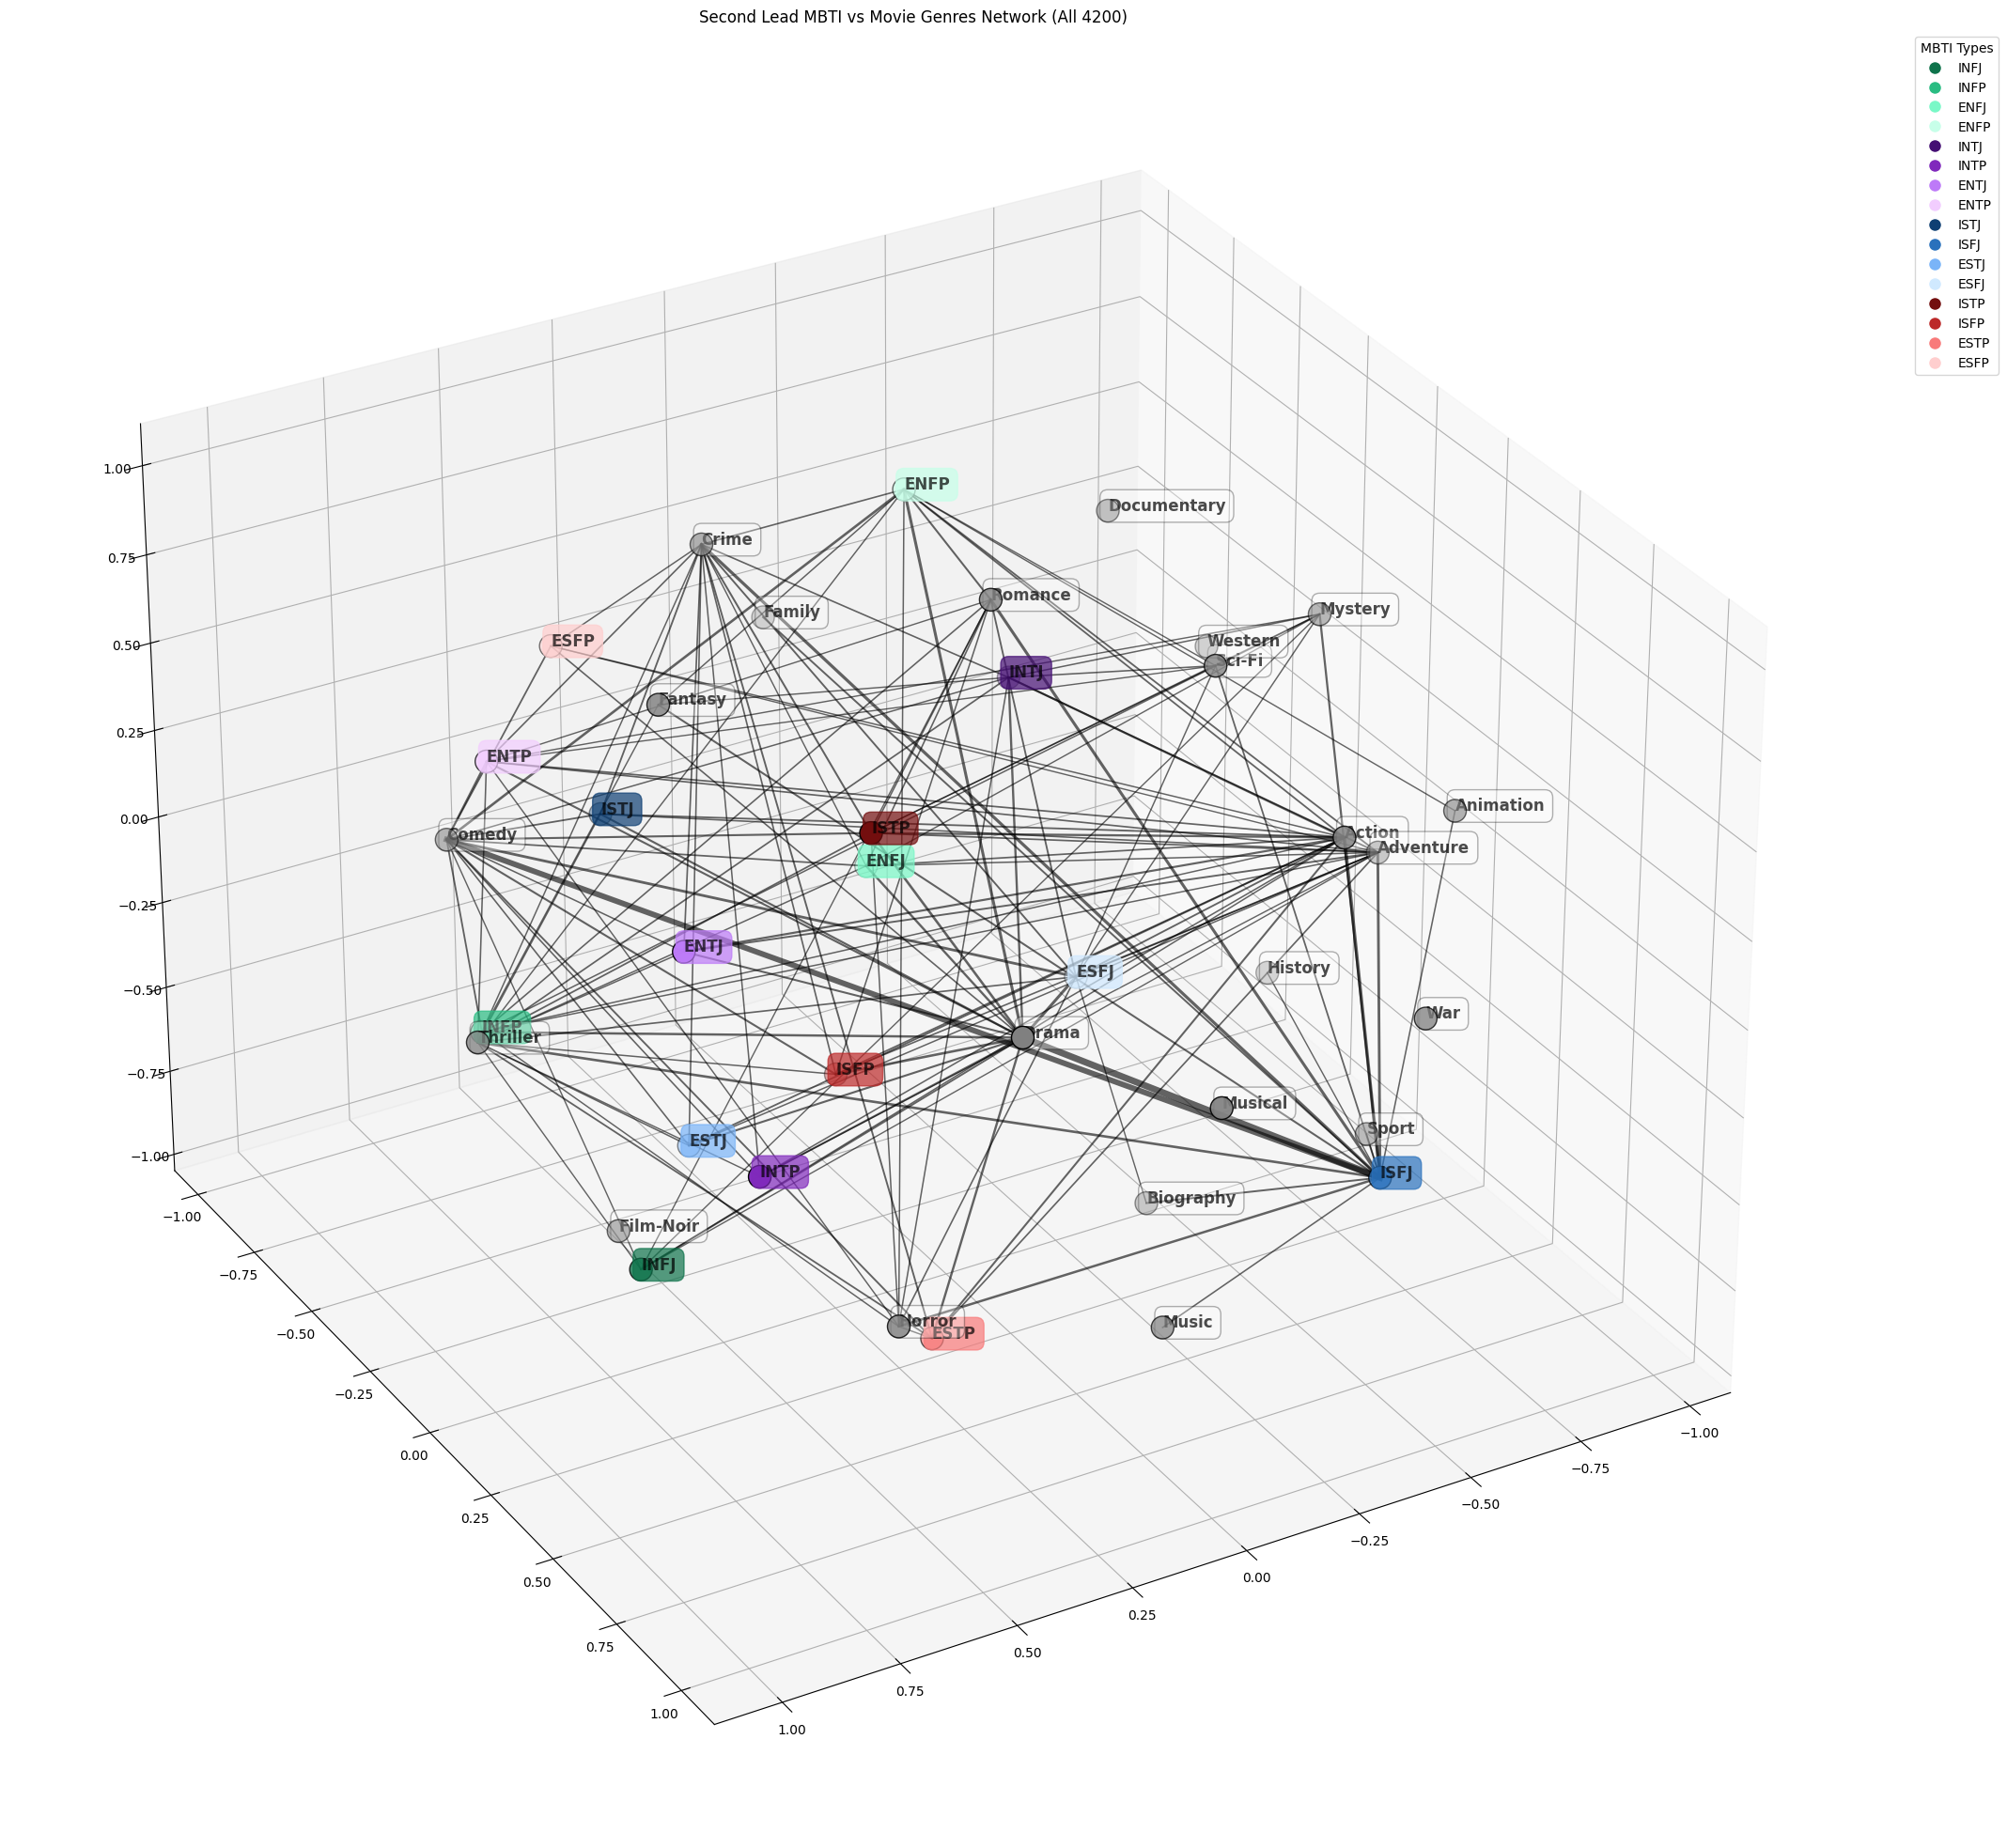

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import matplotlib.cm as cm  # Import colormap
import numpy as np  # To normalize the weights

# Assuming your dataframe is already loaded as 'df2'
mbti_column = 'secondlead_MBTI'  # Column for lead MBTI type
genres_column = 'genres'   # Column for genres (which are comma-separated)

# Define the genres list (for valid genre types)
genres = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
          'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
          'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# MBTI color mapping from the image provided
mbti_colors = {
    'INFJ': '#0E734B', 'INFP': '#29BC82', 'ENFJ': '#7AF8C7', 'ENFP': '#C7FFE9',
    'INTJ': '#440E73', 'INTP': '#8029BC', 'ENTJ': '#BD7AF8', 'ENTP': '#F2CDFF',
    'ISTJ': '#0E3F73', 'ISFJ': '#2971BC', 'ESTJ': '#7AB4F8', 'ESFJ': '#D0E9FF',
    'ISTP': '#730E0E', 'ISFP': '#BC2929', 'ESTP': '#F87A7A', 'ESFP': '#FFCECE'
}

# Set genre color to gray
genre_color = '#808080'  # Gray color for all genre nodes

# Initialize a bipartite graph
B = nx.Graph()

# Add MBTI types as nodes (from 'lead_MBTI' column)
mbti_types = df2[mbti_column].unique()  # Get unique MBTI types from the dataset
B.add_nodes_from(mbti_types, bipartite=0)  # Set of MBTI types

# Add genres as nodes
B.add_nodes_from(genres, bipartite=1)  # Set of genres

# Dictionary to hold the weight of each edge
edge_weights = {}

# Iterate through each row in the dataset
for index, row in df2.iterrows():
    mbti = row[mbti_column]  # Get the MBTI type for the lead character

    # Check if genres column has any value, skip if NaN or empty
    if pd.notnull(row[genres_column]):
        # Split the genres string into a list, and make sure to strip any extra spaces
        row_genres = [genre.strip() for genre in row[genres_column].split(',') if genre.strip()]

        # Create edges between the MBTI and each genre in the list and count weights
        for genre in row_genres:
            if genre in genres:  # Only add edges for valid genres
                if (mbti, genre) in edge_weights:
                    edge_weights[(mbti, genre)] += 1
                else:
                    edge_weights[(mbti, genre)] = 1

# Now that we have edge weights, calculate the mean weight
mean_weight = np.mean(list(edge_weights.values()))

# Adjust the threshold to include more edges (slightly below the mean weight)
threshold_weight = mean_weight * 0.7  # Adjust this to fit more edges

# Filter edges to only keep those with weight >= threshold_weight
filtered_edges = [(u, v) for (u, v), weight in edge_weights.items() if weight >= threshold_weight]
filtered_weights = [weight for (u, v), weight in edge_weights.items() if weight >= threshold_weight]

# Normalize the filtered edge weights for color mapping and thickness
normalized_weights = (np.array(filtered_weights) - np.min(filtered_weights)) / (np.max(filtered_weights) - np.min(filtered_weights))

# Create a custom grayscale colormap, starting with a lighter grey and going to dark grey
light_gray_cmap = cm.ScalarMappable(cmap='Greys_r')
edge_colors = [light_gray_cmap.to_rgba(normalized_weights[i] * 0.8 + 0.2) for i in range(len(filtered_weights))]

# Set edge thickness proportional to the weight, but reduce the range for clarity
edge_thickness = [1 + 4 * normalized_weights[i] for i in range(len(filtered_weights))]  # Thickness range: 1 to 5

# Use a 3D layout for node positioning
pos_3d = nx.spring_layout(B, dim=3, k=1.5, iterations=150)  # Increased 'k' for more spacing

# Increase the figure size for better visibility and add gridlines
fig = plt.figure(figsize=(25, 25))
ax = fig.add_subplot(111, projection='3d', facecolor='white')
ax.grid(True)  # Enable gridlines

# Extract positions for nodes
xs = [pos_3d[node][0] for node in B.nodes()]
ys = [pos_3d[node][1] for node in B.nodes()]
zs = [pos_3d[node][2] for node in B.nodes()]

# Draw nodes for MBTI types with color coding based on MBTI types, smaller size, and border
mbti_nodes = [node for node in B.nodes if node in mbti_types]
mbti_xs = [pos_3d[node][0] for node in mbti_nodes]
mbti_ys = [pos_3d[node][1] for node in mbti_nodes]
mbti_zs = [pos_3d[node][2] for node in mbti_nodes]
mbti_plot = ax.scatter(mbti_xs, mbti_ys, mbti_zs, c=[mbti_colors[n] for n in mbti_nodes], s=300, edgecolor='black', linewidth=1, label='MBTI Types')

# Draw nodes for genres with gray color
genre_nodes = [node for node in B.nodes if node in genres]
genre_xs = [pos_3d[node][0] for node in genre_nodes]
genre_ys = [pos_3d[node][1] for node in genre_nodes]
genre_zs = [pos_3d[node][2] for node in genre_nodes]
genre_plot = ax.scatter(genre_xs, genre_ys, genre_zs, c=genre_color, s=300, edgecolor='black', linewidth=1, label='Genres')

# Draw edges with color based on the weight (darker edges for heavier weights) and thickness based on weight, add transparency
for edge, color, thickness in zip(filtered_edges, edge_colors, edge_thickness):
    x = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x, y, z, color=color, linewidth=thickness, alpha=0.6)  # Add transparency to edges

# Add labels to MBTI types with black text and background matching MBTI colors
for node, (x, y, z) in pos_3d.items():
    if node in mbti_types:
        ax.text(x, y, z, s=node, fontsize=12, fontweight='bold', color='black', alpha=0.7,
                bbox=dict(facecolor=mbti_colors[node], edgecolor=mbti_colors[node], alpha=0.7, boxstyle='round,pad=0.5'))

# Add labels to genres with transparent background and slightly transparent text
for node, (x, y, z) in pos_3d.items():
    if node in genres:
        ax.text(x, y, z, s=node, fontsize=12, fontweight='bold', color='black', alpha=0.7,
                bbox=dict(facecolor='white', edgecolor='black', alpha=0.3, boxstyle='round,pad=0.5'))

# Adjust the viewing angle
ax.view_init(elev=30, azim=60)  # Set elevation and azimuth for a clearer view

# Add a color legend for MBTI types
handles = [plt.Line2D([0], [0], marker='o', color='w', label=mbti, markerfacecolor=mbti_colors[mbti], markersize=10) for mbti in mbti_colors]
plt.legend(handles=handles, title="MBTI Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Display the 3D graph
plt.title('Second Lead MBTI vs Movie Genres Network (All 4200)')
plt.show()
